<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - XGBoost - German Credit Risk
</b></font> </br></p>

---


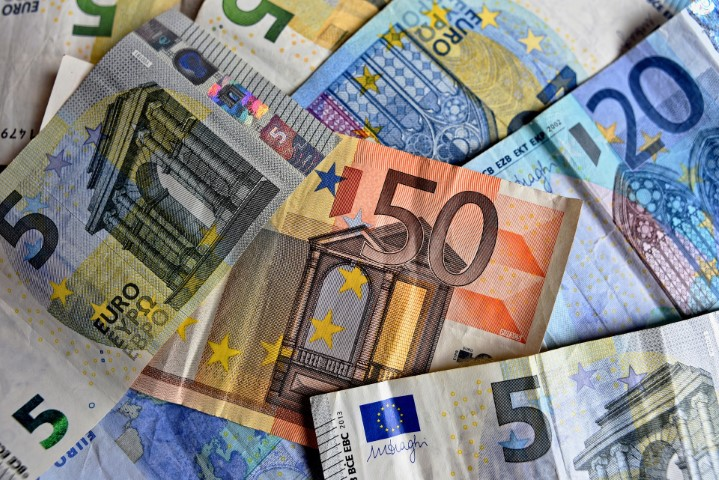

Bild von <a href="https://pixabay.com/de/users/mabelamber-1377835/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3481699">👀 Mabel Amber, who will one day</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3481699">Pixabay</a>

# **1  <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

In diesem Datensatz repräsentiert jeder Eintrag eine Person, die einen Kredit bei einer Bank aufnimmt. Jede Person wird gemäß dem Satz von Attributen als gutes oder schlechtes Kreditrisiko eingestuft. Der Datensatz enthält 1000 Einträge mit 20 kategorialen/symbolischen Attributen.

[DataSet](https://www.openml.org/search?type=data&status=active&id=31)

[Info](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))



In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', data_id=43808)

In [ ]:
data = df.data.copy()
label = 'kredit'
features = [n for n in data.columns if n != label]

In [ ]:
target = data[label].copy()
data.drop([label], axis=1, inplace=True)

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = df.frame.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Skalierung
</font></p>


In [ ]:
#

<p><font color='black' size="5">
Upsampling
</font></p>

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
data_resampled, target_resampled = ros.fit_resample(data, target)

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

<p><font color='black' size="5">
Train-Test-Split
</font></p>

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data_resampled, target_resampled, test_size=0.35, random_state=42, stratify=target_resampled)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>



[Doku](https://xgboost.readthedocs.io/en/stable/index.html#)
[Parameter](https://xgboost.readthedocs.io/en/latest/parameter.html)

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(n_estimators=150, learning_rate=0.3, gamma=1.7, max_depth=6, min_child_weight=20 ,random_state=42)
model.fit(data_train, target_train)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)


<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(target_train, target_train_pred) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

In [ ]:
acc_test = accuracy_score(target_test, target_test_pred) * 100
print (f"Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}")


<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target_test, target_test_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No','Yes'])
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target_test, target_test_pred, target_names=['No','Yes']))

In [ ]:
prob_res = model.predict_proba(data_test)

<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test.values, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred, columns=['predict'])

# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(data_test)
pca_df = pd.DataFrame(pca)

# Cube um pca erweitern
cube['PCA1'] = pca_df[0]
cube['PCA2'] = pca_df[1]

<p><font color='black' size="5">
Visualisierung real vs predict
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# Histogramm
title_ = 'Histogramm real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], nbins=2, title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=600, height=600)
fig.show()

In [ ]:
# 2 x Scatterplots

cube['real_cat'] = cube['real'].astype(str)
cube['predict_cat'] = cube['predict'].astype(str)

# Farbzuteilung für Kategoriewerte
color_mapping = {'0': 'red', '1': 'blue'}

title_ = 'Streupunktdiagramm'

img1 = px.scatter(cube, x='PCA1', y='PCA2', color='real_cat', color_discrete_map=color_mapping, width=600, height=600)

img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict_cat', color_discrete_map=color_mapping, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text=title_)

# Plot anzeigen
fig.show()

In [ ]:
# real <> predict
cube[cube.real != cube.predict].describe().T

In [ ]:
cube[cube.real != cube.predict]


<p><font color='black' size="5">
Feature Importance
</font></p>

In [ ]:
import plotly.express as px
px.bar(x=model.feature_importances_, y=data.columns, width=1000, height=700).update_yaxes(categoryorder="total ascending")

<p><font color='black' size="5">
Entscheidungsbaum
</font></p>

In [ ]:
%%capture
try:
  import dtreeviz
except:
  !pip install -q dtreeviz
  import dtreeviz

In [ ]:
viz_model = dtreeviz.model(model, data_test, target_test, tree_index=1,
                           target_name="target",
                           feature_names=list(data.columns.values),
                           class_names=["No", "Yes"])

In [ ]:
viz_model.view(scale=1.5, fontname='Monospace')

In [ ]:
viz_model.view(scale=1.5, orientation="LR", fontname='Monospace')

In [ ]:
# local Explanation
one = data_test.iloc[13]
viz_model.view(x=one, fontname='Monospace')

In [ ]:
# local Explanation
viz_model.view(x=one, show_just_path=True, fontname='Monospace')

In [ ]:
print(viz_model.explain_prediction_path(one))

In [ ]:
viz_model.leaf_sizes(fontname='Monospace')

In [ ]:
viz_model.ctree_leaf_distributions(fontname='Monospace')

In [ ]:
viz_model.node_stats(node_id=3)

In [ ]:
tree_img = viz_model.view(scale=0.8, fontname='Monospace')
tree_img.save('tree.svg')

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>